In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings("ignore")

In [4]:
p_data=pd.read_csv('parkinsons.txt',delim_whitespace=True)

In [4]:
p_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
p_data.size

4680

In [6]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
len(p_data.index)

195

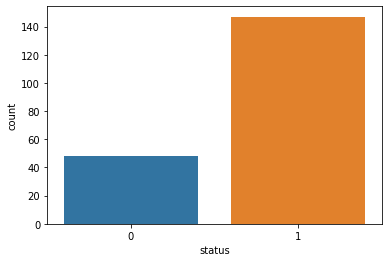

In [9]:
sns.countplot(x='status',data=p_data)

In [10]:
p_data.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [11]:
p_data.columns=['name', 'Fo', 'Fhi', 'Flo', 'Jitter',
       'JitterA', 'RAP', 'PPQ', 'DDP',
       'Shimmer', 'ShimmerdB', 'ShimmerAPQ3', 'ShimmerAPQ5',
       'APQ', 'DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']

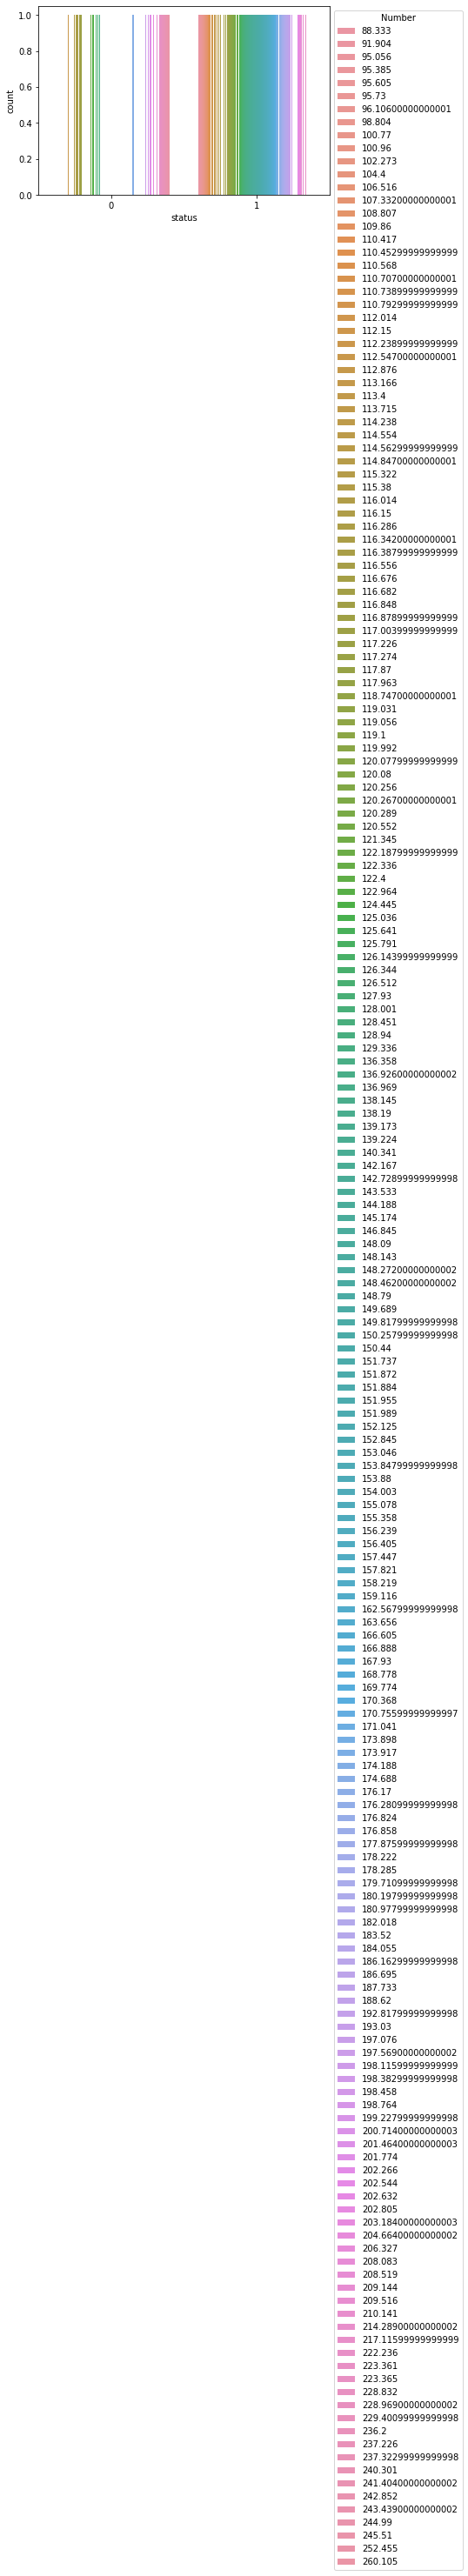

In [12]:
sns.countplot(x='status',hue='Fo',data=p_data)
#plt.xticks(rotation = 45, ha = 'right')
plt.legend(title = 'Number', bbox_to_anchor = (1, 1))

In [13]:
df1=p_data

In [14]:
df1.head()

,name,Fo,Fhi,Flo,Jitter,JitterA,RAP,PPQ,DDP,Shimmer,ShimmerdB,ShimmerAPQ3,ShimmerAPQ5,APQ,DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [15]:
df1.describe()

,Fo,Fhi,Flo,Jitter,JitterA,RAP,PPQ,DDP,Shimmer,ShimmerdB,ShimmerAPQ3,ShimmerAPQ5,APQ,DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [16]:
del df1['name']

In [17]:
df1.corr()

,Fo,Fhi,Flo,Jitter,JitterA,RAP,PPQ,DDP,Shimmer,ShimmerdB,ShimmerAPQ3,ShimmerAPQ5,APQ,DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
Fo,1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
Fhi,0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
Flo,0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
Jitter,-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
JitterA,-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
ShimmerdB,-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


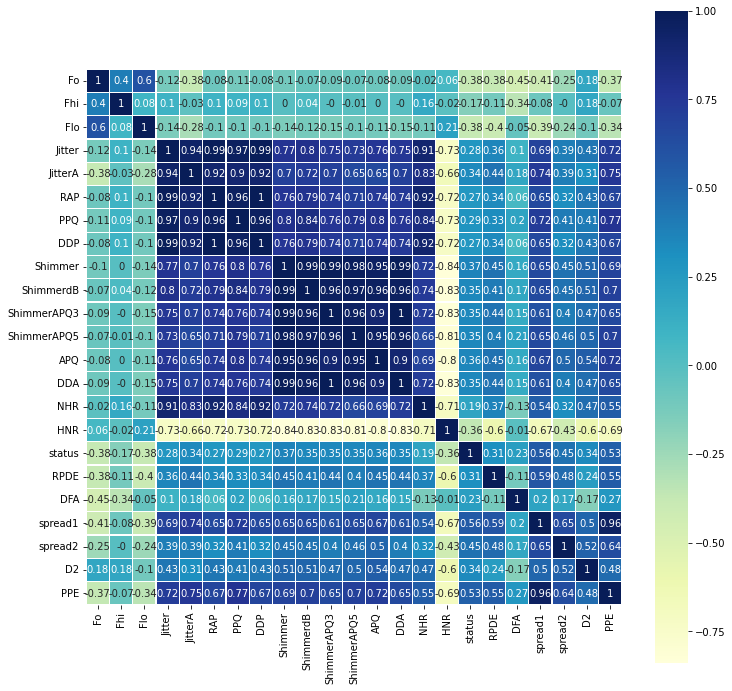

In [18]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr().round(2),annot=True,linewidths=0.2,square=True,cmap="YlGnBu")

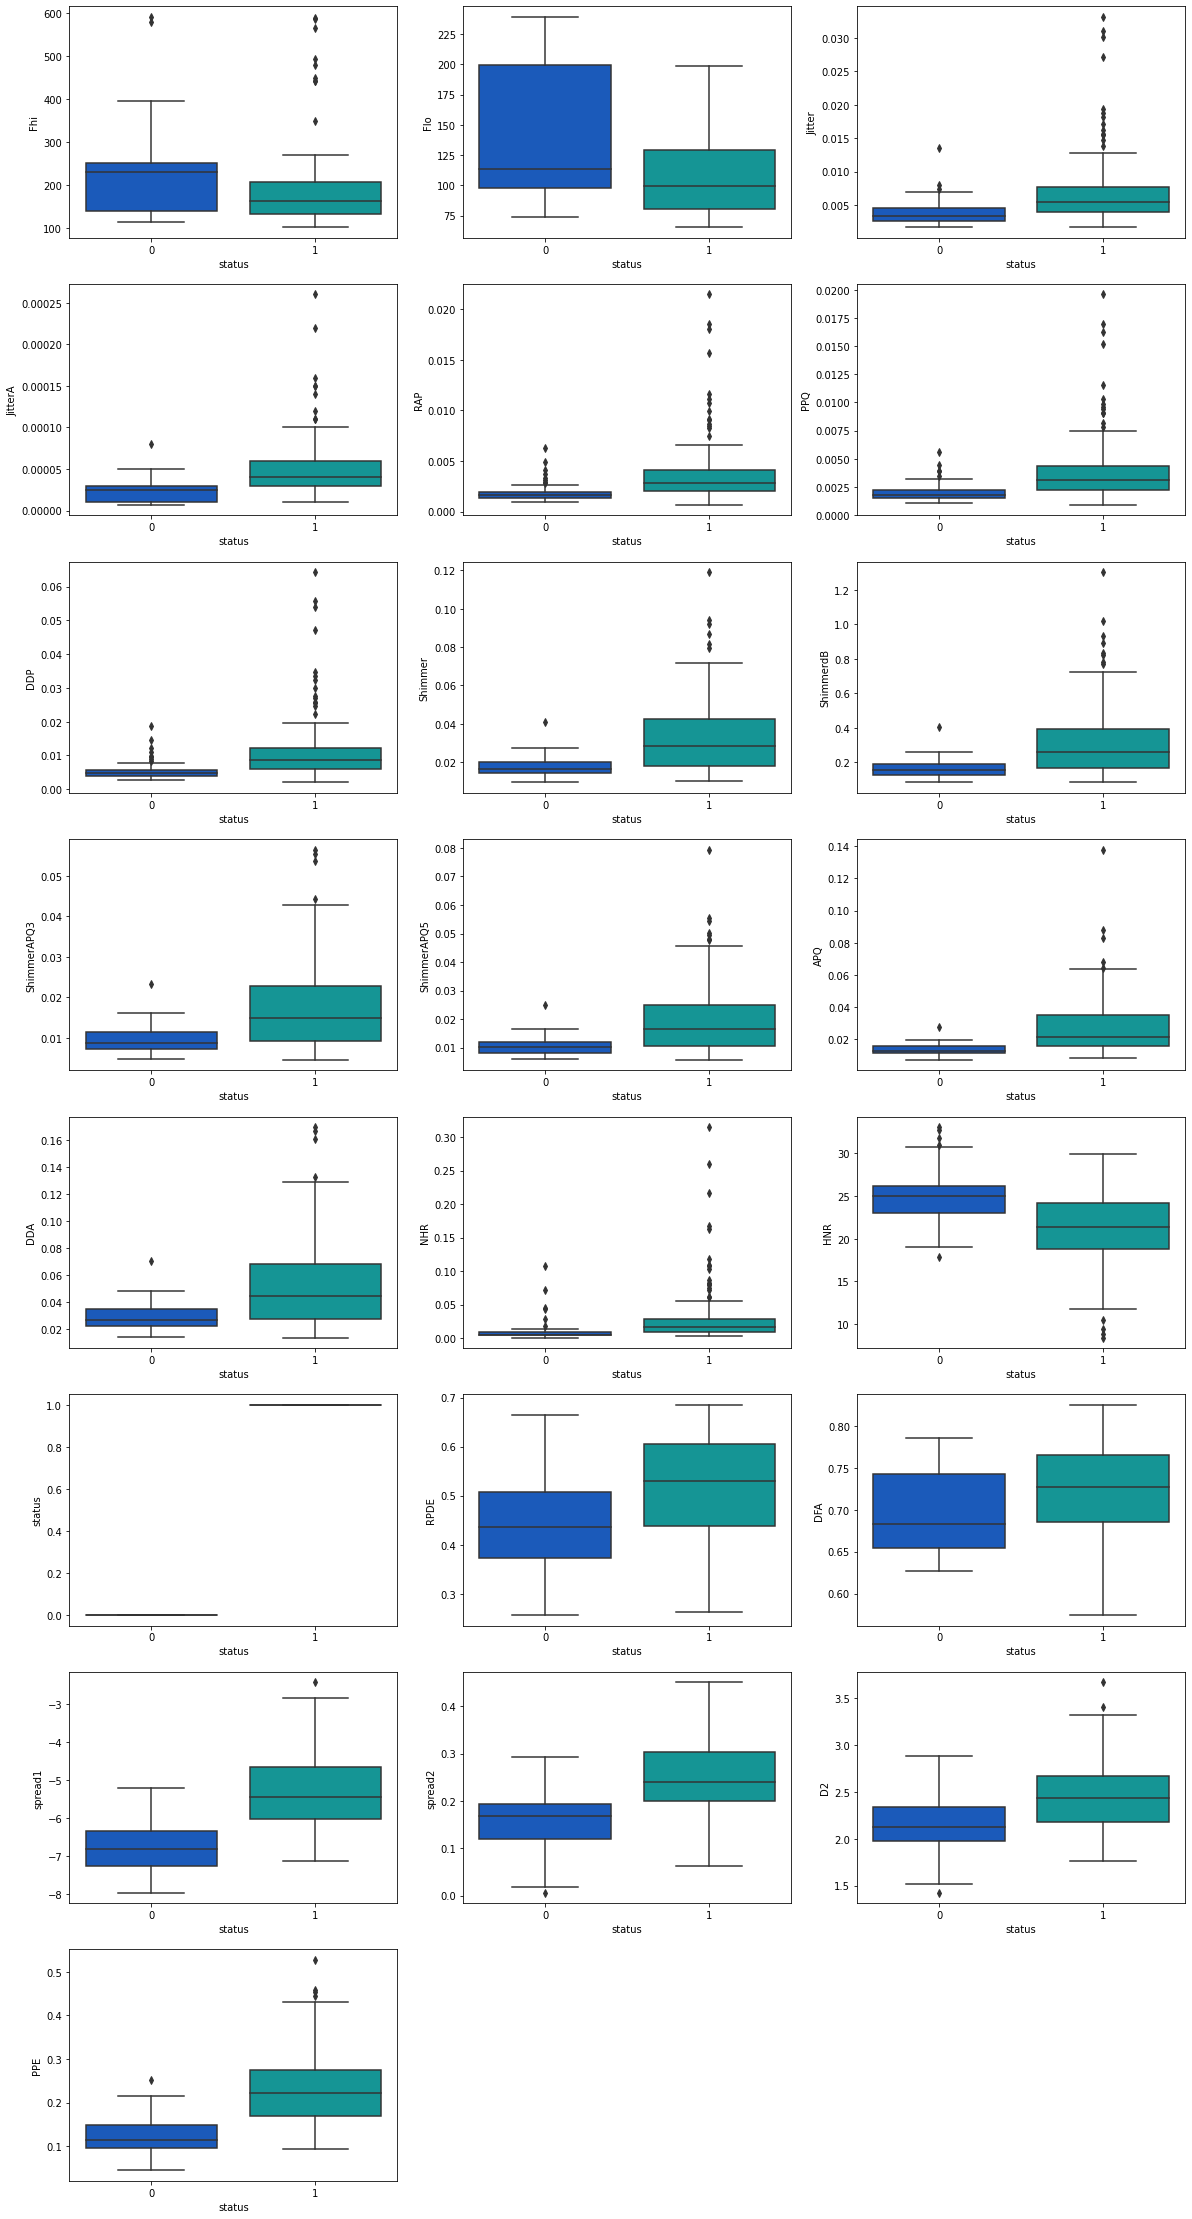

In [19]:
#Do the same for all features
plt.figure(figsize=(20,40))
l=list(df1.columns[0:23])
for i in range(1,23):
    plt.subplot(8,3,i)
    sns.boxplot(x='status',y=l[i], data=df1, palette='winter')

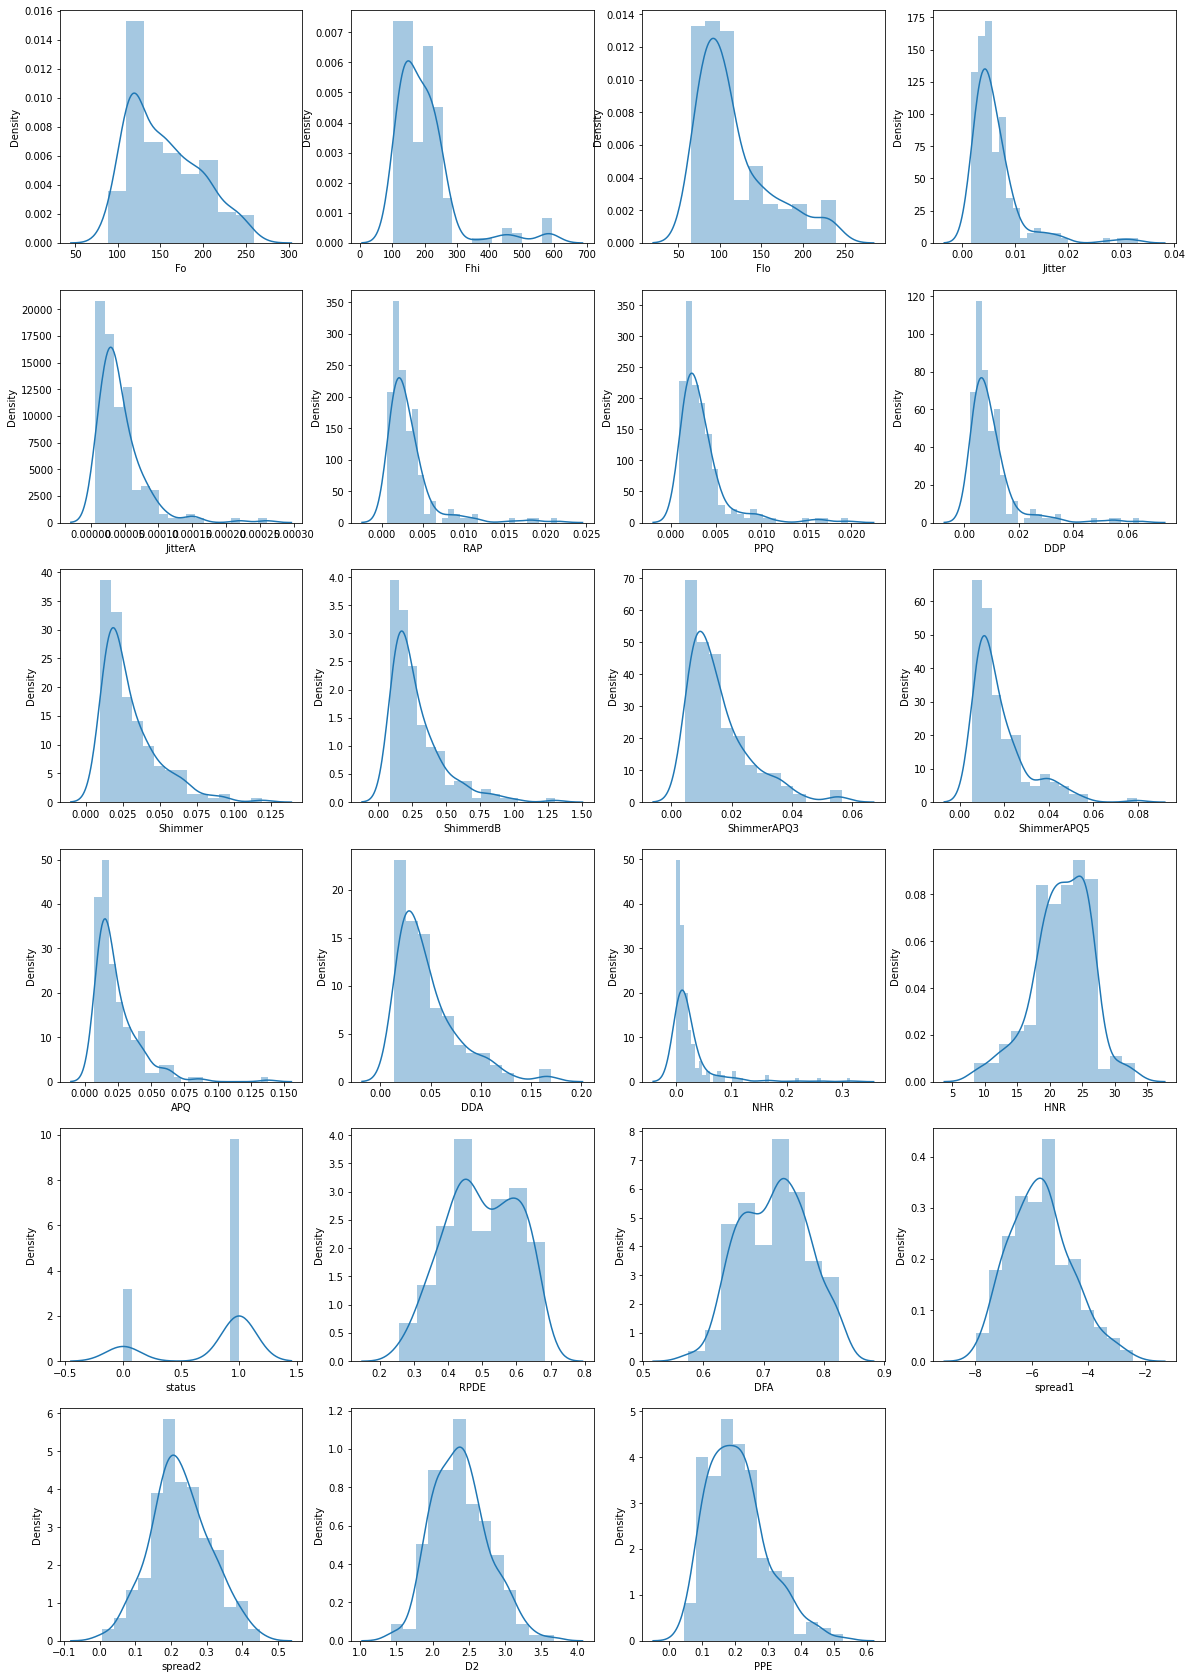

In [20]:
plt.figure(figsize=(20,30))
for i, column in enumerate(df1.columns, 1):
    plt.subplot(6,4,i)
    sns.distplot(df1[column])

In [21]:
#r=1
#c=1
#for i in range(23):
 # plt.figure()
 # plt.subplot(r*i,c,i)
  #sns.distplot(a=df1.iloc[:,i])


In [22]:
# correlation coefficient values in each attributes.
correlation_values=df1.corr()['status']
correlation_values.abs().sort_values(ascending=False)

status         1.000000
spread1        0.564838
PPE            0.531039
spread2        0.454842
Fo             0.383535
Flo            0.380200
Shimmer        0.367430
APQ            0.364316
HNR            0.361515
ShimmerAPQ5    0.351148
ShimmerdB      0.350697
ShimmerAPQ3    0.347617
DDA            0.347608
D2             0.340232
JitterA        0.338653
RPDE           0.308567
PPQ            0.288698
Jitter         0.278220
RAP            0.266668
DDP            0.266646
DFA            0.231739
NHR            0.189429
Fhi            0.166136
Name: status, dtype: float64

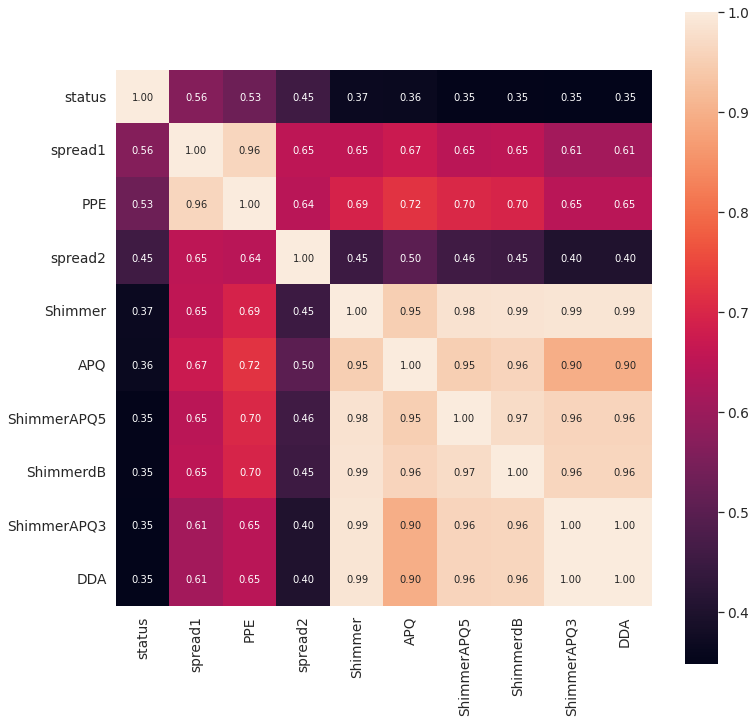

In [23]:
k=10
corr_map=df1.corr()
# finding the columns which related to output attribute and we are arranging from top coefficient correlation value to downwards.
cols=corr_map.nlargest(k,'status')['status'].index

# correlation coefficient values
coff_values=np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(12,12))
sns.heatmap(coff_values,cbar=True,annot=True,square=True,fmt='.2f',
           annot_kws={'size': 10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [24]:
# Checking null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fo           195 non-null    float64
 1   Fhi          195 non-null    float64
 2   Flo          195 non-null    float64
 3   Jitter       195 non-null    float64
 4   JitterA      195 non-null    float64
 5   RAP          195 non-null    float64
 6   PPQ          195 non-null    float64
 7   DDP          195 non-null    float64
 8   Shimmer      195 non-null    float64
 9   ShimmerdB    195 non-null    float64
 10  ShimmerAPQ3  195 non-null    float64
 11  ShimmerAPQ5  195 non-null    float64
 12  APQ          195 non-null    float64
 13  DDA          195 non-null    float64
 14  NHR          195 non-null    float64
 15  HNR          195 non-null    float64
 16  status       195 non-null    int64  
 17  RPDE         195 non-null    float64
 18  DFA          195 non-null    float64
 19  spread1 

In [25]:
df1.isna().sum()

Fo             0
Fhi            0
Flo            0
Jitter         0
JitterA        0
RAP            0
PPQ            0
DDP            0
Shimmer        0
ShimmerdB      0
ShimmerAPQ3    0
ShimmerAPQ5    0
APQ            0
DDA            0
NHR            0
HNR            0
status         0
RPDE           0
DFA            0
spread1        0
spread2        0
D2             0
PPE            0
dtype: int64

In [26]:
y=df1[['status']]
X=df1[['spread1','PPE','spread2','Fo','Flo','Shimmer','APQ','HNR','ShimmerAPQ5','ShimmerdB' ]]

# RANDOM UNDER SAMPLING

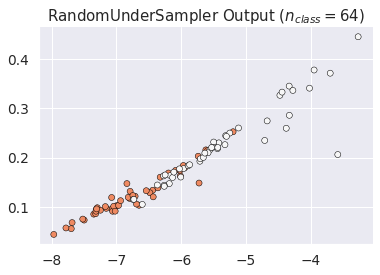

In [27]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_sample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output ($n_{class}=64)$")
pass

In [28]:
my_array = np.array(y_resampled)
my_arrayx=np.array(X_resampled)


In [29]:
dfnew = pd.DataFrame(my_array, columns = ['status'])
dfnew1 = pd.DataFrame(my_arrayx, columns = ['spread1','PPE','spread2','Fo','Flo','Shimmer','APQ','HNR','ShimmerAPQ5','ShimmerdB' ])

In [30]:
y=dfnew[['status']]
X=dfnew1[['spread1','PPE','spread2','Fo','Flo','Shimmer','APQ','HNR','ShimmerAPQ5','ShimmerdB' ]]

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [32]:
def FeatureScaling(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    for i in range(X.shape[1]):
        X.iloc[:,i] = (X.iloc[:,i]-mean[i])/std[i]

    return X

In [33]:
Y = FeatureScaling(X)


In [34]:
m,n = X_scaled.shape
X_scaled = np.append(arr=np.ones((m,1)),values=X_scaled,axis=1)
X=X_scaled
X

array([[ 1.        , -1.25009582, -1.11142894, ...,  0.89489815,
        -0.87079618, -0.89627155],
       [ 1.        , -1.57746618, -1.32655903, ...,  1.87662555,
        -0.91248536, -0.94806512],
       [ 1.        , -0.97552785, -0.97592017, ...,  1.83773359,
        -0.71579793, -0.8056328 ],
       ...,
       [ 1.        ,  0.53074579,  0.58953317, ..., -0.94858084,
         0.47608513,  0.86470984],
       [ 1.        ,  0.42817   ,  0.44673912, ..., -1.32288651,
         2.17572107,  1.82289089],
       [ 1.        ,  1.3326297 ,  0.76963593, ...,  0.98706031,
        -0.92424385, -0.76678762]])

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
# Splitting the dataset into trianing and test set

print(f"Shape of X_train = {x_train.shape}")
print(f"Shape of X_test = {x_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (76, 11)
Shape of X_test = (20, 11)
Shape of y_train = (76, 1)
Shape of y_test = (20, 1)


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lmodel=LogisticRegression()

In [39]:
lmodel.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
predictions=lmodel.predict(x_test)


In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[10,  1],
       [ 1,  8]])

In [43]:
#print(confusion_matrix())
cm= confusion_matrix(y_test, predictions)

true_negative = cm[1][1]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_positive = cm[0][0]
print('Confusion Matrix: \n', cm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', round((true_negative + true_positive) / len(predictions) * 100, 1), '%')
print('Sensitivity', round((true_positive) / (false_negative + true_positive) * 100, 1), '%')
print('Spec', round((true_negative) / (false_positive + true_negative) * 100, 1), '%')



Confusion Matrix: 
 [[10  1]
 [ 1  8]] 

True Negative: 8
False Positive: 1
False Negative: 1
True Positive: 10
Correct Predictions 90.0 %
Sensitivity 90.9 %
Spec 88.9 %


In [49]:
  from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, predictions)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.89      0.89      0.89         9

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



# DECISION TREE

In [122]:
from sklearn.tree import DecisionTreeClassifier


In [123]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.80      0.89      0.84         9

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



In [53]:
#print(confusion_matrix())
cm= confusion_matrix(y_test, y_pred)

true_negative = cm[1][1]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_positive = cm[0][0]
print('Confusion Matrix: \n', cm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', round((true_negative + true_positive) / len(y_pred) * 100, 1), '%')
print('Sensitivity', round((true_positive) / (false_negative + true_positive) * 100, 1), '%')
print('Spec', round((true_negative) / (false_positive + true_negative) * 100, 1), '%')


Confusion Matrix: 
 [[9 2]
 [1 8]] 

True Negative: 8
False Positive: 2
False Negative: 1
True Positive: 9
Correct Predictions 85.0 %
Sensitivity 90.0 %
Spec 80.0 %


In [54]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_pred)

# SVM CLASSIFIER

In [101]:
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
md = svm.SVC(kernel='sigmoid',C=5)
md.fit(x_train,y_train)
y_pred_tr = md.predict(x_test)
print(classification_report(y_test, y_pred_tr))


              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.78      0.78      0.78         9

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



In [102]:
#print(confusion_matrix())
cm= confusion_matrix(y_test, y_pred_tr)

true_negative = cm[1][1]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_positive = cm[0][0]
print('Confusion Matrix: \n', cm, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', round((true_negative + true_positive) / len(y_pred_tr) * 100, 1), '%')
print('Sensitivity', round((true_positive) / (false_negative + true_positive) * 100, 1), '%')
print('Spec', round((true_negative) / (false_positive + true_negative) * 100, 1), '%')


Confusion Matrix: 
 [[9 2]
 [2 7]] 

True Negative: 7
False Positive: 2
False Negative: 2
True Positive: 9
Correct Predictions 80.0 %
Sensitivity 81.8 %
Spec 77.8 %


In [103]:
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_pred_tr)

# K-NEAREST NEIGHBORS


In [58]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [59]:
y_pred_KNN= classifier.predict(x_test)  

In [60]:
from sklearn.metrics import confusion_matrix 
cm1= confusion_matrix(y_test, y_pred_KNN)   
print(cm1)   
print(classification_report(y_test,y_pred_KNN))

[[10  1]
 [ 2  7]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.88      0.78      0.82         9

    accuracy                           0.85        20
   macro avg       0.85      0.84      0.85        20
weighted avg       0.85      0.85      0.85        20



In [61]:


true_negative = cm1[1][1]
false_positive = cm1[0][1]
false_negative = cm1[1][0]
true_positive = cm1[0][0]
print('Confusion Matrix: \n', cm1, '\n')

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', round((true_negative + true_positive) / len(y_pred_KNN) * 100, 1), '%')
print('Sensitivity', round((true_positive) / (false_negative + true_positive) * 100, 1), '%')
print('Spec', round((true_negative) / (false_positive + true_negative) * 100, 1), '%')


Confusion Matrix: 
 [[10  1]
 [ 2  7]] 

True Negative: 7
False Positive: 1
False Negative: 2
True Positive: 10
Correct Predictions 85.0 %
Sensitivity 83.3 %
Spec 87.5 %


In [62]:
false_positive_rate4, true_positive_rate4, threshold4= roc_curve(y_test, y_pred_KNN)

ROC CURVES

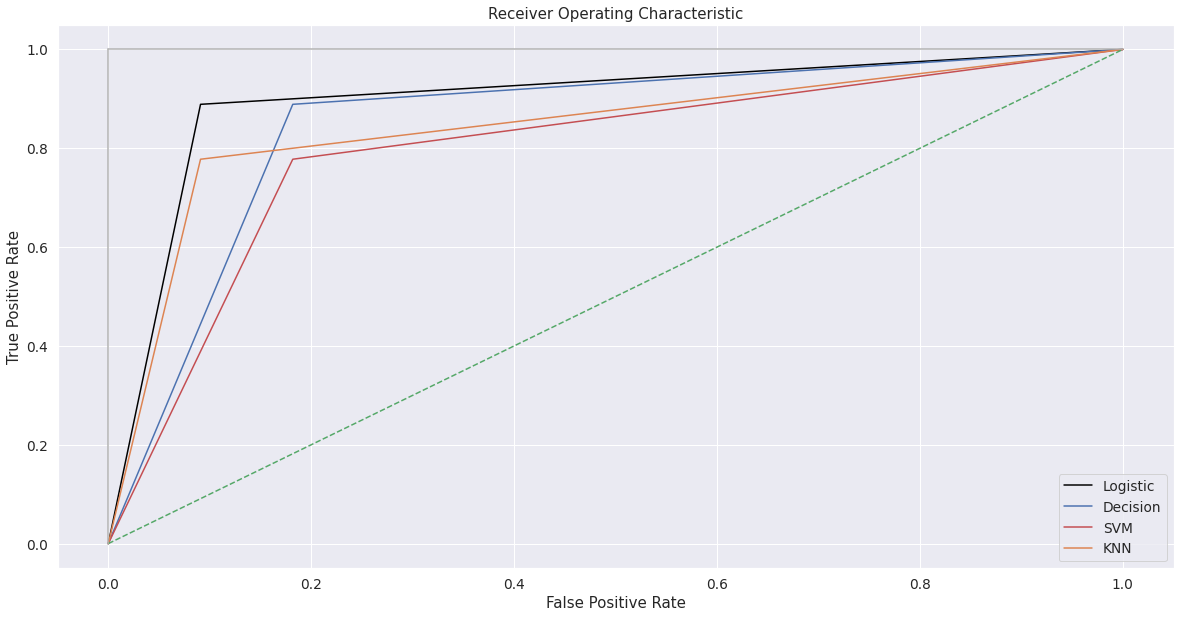

In [105]:
    plt.subplots(1, figsize=(20,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate1, true_positive_rate1,'black',label="Logistic")
    plt.plot(false_positive_rate2, true_positive_rate2,label="Decision")
    plt.plot(false_positive_rate3, true_positive_rate3,'r',label="SVM")
    plt.plot(false_positive_rate4, true_positive_rate4,label="KNN")
    plt.plot([0, 1], ls="--")
    plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.show()